In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm, dates

In [ ]:
# Visualisation args
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}

In [ ]:
df = pd.read_csv('#haddad_vader.csv')

In [ ]:
#convert to datetime columns
df['date']=pd.to_datetime(df['date'])

# create additional date time columns
df['created_at_r']=df['date'].dt.strftime('%Y-%m-%d %H')
df['created_at_r2']=df['date'].dt.strftime('%m-%d')

In [ ]:
compound_mean_by_day = df.groupby('created_at_r2')['compound'].mean().sort_index()
compound_mean_by_hour = df.groupby('created_at_r')['compound'].mean().sort_index()
compound_mean_by_hour

created_at_r
2018-03-01 11   -0.669600
2018-03-02 21    0.757900
2018-03-04 01   -0.153100
2018-03-06 02    0.318200
2018-03-06 23   -0.296000
                   ...   
2018-10-28 19   -0.002832
2018-10-28 20    0.168104
2018-10-28 21    0.077759
2018-10-28 22    0.075692
2018-10-28 23   -0.137010
Name: compound, Length: 1693, dtype: float64

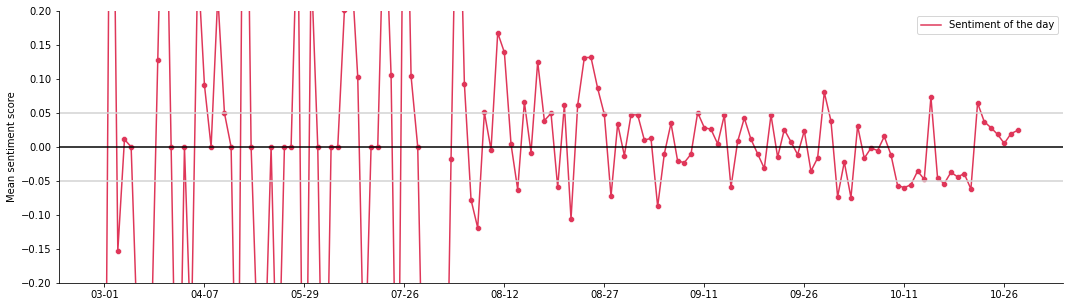

In [ ]:
fig, lineax = plt.subplots(1,1, figsize=(18,5), gridspec_kw={'hspace':0.05})
#lineax = ax[0]
sns.lineplot(x=compound_mean_by_day.index, y=compound_mean_by_day.values, color=barcolors[6], ax=lineax, label='Sentiment of the day')
sns.scatterplot(x=compound_mean_by_day.index, y=compound_mean_by_day.values, color=barcolors[6], ax=lineax)
lineax.set_ylim([-0.2, 0.2])
lineax.set_ylabel('Mean sentiment score')
lineax.set_xlabel('')
#plt.xticks(rotation=90)
lineax.set_xticks(range(0, len(compound_mean_by_day.index), 15))
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.05, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.05, color='lightgrey', linestyle='-')
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)

In [1]:
fig, lineax = plt.subplots(1,1, figsize=(18,5), gridspec_kw={'hspace':0.05})
#lineax=ax[1]
sns.lineplot(x=compound_mean_by_hour.index, y=compound_mean_by_hour.values, color=barcolors[6], ax=lineax, label='Trump Dataset (L14D)')
#sns.scatterplot(x=compound_mean_by_hour.index, y=compound_mean_by_hour.values, color=barcolors[6], ax=lineax)
lineax.set_ylim([-0.2, 0.2])
lineax.set_ylabel('mean sentiment score')
lineax.set_xlabel('')
#plt.xticks(rotation=90)
lineax.set_xticks(range(0, len(compound_mean_by_hour.index), 360))
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.05, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.05, color='lightgrey', linestyle='-')
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
#lineax.set_xscale('log')
plt.show()


NameError: ignored

In [ ]:
# Calculate counts of sentiments
stack_df=df.groupby(['created_at_r','sentiment'])['content'].count().reset_index()
stack_df

,created_at_r,sentiment,content
0,2018-03-01 11,neg,1
1,2018-03-02 21,pos,1
2,2018-03-04 01,neg,1
3,2018-03-06 02,pos,1
4,2018-03-06 23,neg,1
...,...,...,...
3874,2018-10-28 22,neu,34
3875,2018-10-28 22,pos,28
3876,2018-10-28 23,neg,75
3877,2018-10-28 23,neu,33


In [ ]:
# Setup np.arrays to allow quick calculations of the proportions of tweet sentiments
a1=np.array(stack_df.loc[stack_df.sentiment == 'pos'].groupby('created_at_r')['content'].sum().tolist())
b1=np.array(stack_df.loc[stack_df.sentiment == 'neu']['content'].tolist())
c1=np.array(stack_df.loc[stack_df.sentiment == 'neg']['content'].tolist())
d1=np.array(stack_df.groupby('created_at_r')['content'].sum().tolist())